### Task 8:

Choose two algorithms from the mentioned sectiones of the book: "Introduction to Algorithms", Thomas H., Cormen Charles E., Leiserson Ronald L. et al. Analyse the chosen algorithms in terms of time and space complexity, design technique used, etc. Implement the algorithms and produce several experiments. Analyse the results.

As the first algorithm, the Strassen algorithm for production of matrices was chosen. 
Its teoretical complexity: $O(n^{lg7})$

In [12]:
import numpy as np
from numpy import *
from time import perf_counter as tpc


def strassen(A, B):
    
    n_i = len(A)
    n_j = len(B[0])
    C = np.zeros([n_i, n_j])
        
    if n_i * n_j <= 4:
            
        C = np.dot(A, B)
            
    else:
            
        median_ind = n // 2
            
        C[:median_ind, :median_ind] = strassen(A[:median_ind, :median_ind], B[:median_ind, :median_ind]) + \
        strassen(A[:median_ind, median_ind:], B[median_ind:, :median_ind])
            
        C[:median_ind, median_ind:] = strassen(A[:median_ind, :median_ind], B[:median_ind, median_ind:]) + \
        strassen(A[:median_ind, median_ind:], B[median_ind:, median_ind:])
            
        C[median_ind:, :median_ind] = strassen(A[median_ind:, :median_ind], B[:median_ind, :median_ind]) + \
        strassen(A[median_ind:, median_ind:], B[median_ind:, :median_ind])
            
        C[median_ind:, median_ind:] = strassen(A[median_ind:, :median_ind], B[:median_ind, median_ind:]) + \
        strassen(A[median_ind:, median_ind:], B[median_ind:, median_ind:])
                        
    return C

    
    
if __name__ == '__main__':
    
    n = 4
    
    A = np.diag([1 for i in range(n)])
    B = np.array([[i + j * n for i in range(1, n + 1)] for j in range(n)])
    print(strassen(A, B))

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


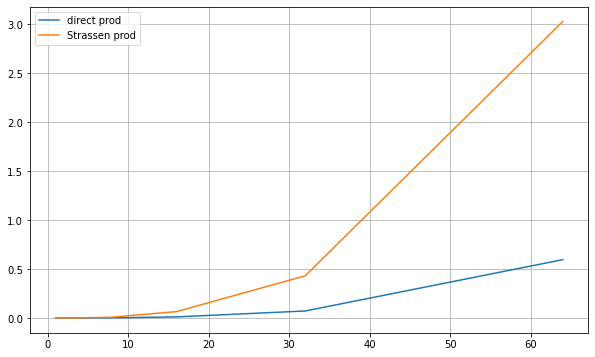

In [34]:
import numpy as np
from numpy import *
from time import perf_counter as tpc


class MatrixMultiplication(object):
    
    
    def __init__(self, size = 10):
        
        self.size = size
        self.matrix_A = np.zeros((size,size), dtype = "i").tolist()
        self.matrix_B = np.zeros((size,size), dtype = "i").tolist()

        
    def generate_random_matrix(self, lower_bound = 0, upper_bound = 100):
        
        self.matrix_A = np.random.randint(lower_bound, upper_bound, (self.size, self.size))
        self.matrix_B = np.random.randint(lower_bound, upper_bound, (self.size, self.size))

        
    def direct_multiply(self):
        
        matrix_product = np.zeros((self.size,self.size), dtype = "i").tolist()
        
        for row in range(0, self.size):
            for col in range(0, self.size):
                for k in range(0, self.size):
                    matrix_product[row][col] += self.matrix_A[row][k] * self.matrix_B[k][col]
                    
        return matrix_product

    
    def matrix_add(self, matrix_a, matrix_b):
        
        rows = len(matrix_a)
        columns = len(matrix_a[0])
        matrix_sum = np.zeros((rows,columns), dtype = "i").tolist()
        
        for i in range(rows):
            for j in range(columns):
                matrix_sum[i][j] = matrix_a[i][j] + matrix_b[i][j]
                
        return matrix_sum

    
    def matrix_minus(self, matrix_a, matrix_b):
        
        rows = len(matrix_a)
        columns = len(matrix_a[0])
        matrix_difference = np.zeros((rows,columns), dtype = "i").tolist()
        # matrix_difference = [[]*columns]*rows
        for i in range(rows):
            for j in range(columns):
                matrix_difference[i][j] = matrix_a[i][j] - matrix_b[i][j]
                
        return matrix_difference

    
    def matrix_divide(self, matrix):
        
        # Возврат к четырем подматрицам: верхний левый, верхний правый, нижний левый и нижний правый соответственно матрицы
        rows = len(matrix)
        columns = len(matrix[0])
        x_middle = rows // 2
        y_middle = columns // 2
        
        matrix_11 = [M[:x_middle] for M in matrix[:y_middle]]
        matrix_12 = [M[x_middle:] for M in matrix[:y_middle]]
        matrix_21 = [M[:x_middle] for M in matrix[y_middle:]]
        matrix_22 = [M[x_middle:] for M in matrix[y_middle:]]
        
        return matrix_11, matrix_12, matrix_21, matrix_22

    
    def matrix_merge(self, matrix_11, matrix_12, matrix_21, matrix_22):
        
        matrix_total = []
        rows1 = len(matrix_11)
        rows2 = len(matrix_21)
        
        for i in range(rows1):
            matrix_total.append(matrix_11[i] + matrix_12[i])
            
        for j in range(rows2):
            matrix_total.append(matrix_21[j] + matrix_22[j])
            
        return matrix_total

    def strassen(self, matrix_a, matrix_b):
        
        rows_a = len(matrix_a)
        cols_a = len(matrix_a[0])
        
        cols_b = len(matrix_b[0])
        matrix_product = np.zeros((rows_a, cols_b), dtype = "i").tolist() 
        # Установите количество строк и столбцов матричного произведения
        
        if rows_a == 1:
            
            for i in range(cols_a):
                
                product = 0
                
                for j in range(cols_b):
                    
                    product += matrix_a[0][i] * matrix_b[i][j]
                    
                matrix_product[0].append(product)
                
            return matrix_product
        
        else:
            
            a,b,c,d = self.matrix_divide(matrix_a)
            e,f,g,h = self.matrix_divide(matrix_b)
            P11 = self.matrix_minus(f,h)
            P21 = self.matrix_add(a,b)
            P31 = self.matrix_add(c,d)
            P41 = self.matrix_minus(g,e)
            P51 = self.matrix_add(a,d)
            P52 = self.matrix_add(e,h)
            P61 = self.matrix_minus(b,d)
            P62 = self.matrix_add(g,h)
            P71 = self.matrix_minus(a,c)
            P72 = self.matrix_add(e,f)
            
            P1 = self.strassen(a, P11)
            P2 = self.strassen(P21, h)
            P3 = self.strassen(P31, e)
            P4 = self.strassen(d, P41)
            P5 = self.strassen(P51, P52)
            P6 = self.strassen(P61, P62)
            P7 = self.strassen(P71, P72)
            
            r = self.matrix_add(self.matrix_minus(self.matrix_add(P5, P4), P2), P6)
            s = self.matrix_add(P1, P2)
            t = self.matrix_add(P3, P4)
            u = self.matrix_minus(self.matrix_minus(self.matrix_add(P5,P1),P3),P7)
            matrix_product = self.matrix_merge(r,s,t,u)
            
            return matrix_product

    
    def compare(self):
        
        size_list = [2 ** i for i in range(7)]
        time_dir = []
        time_strass = []
        
        for size in size_list:
            
            self.size = size
            self.generate_random_matrix()
            
            start = tpc()
            self.direct_multiply()
            end = tpc()
            
            time_dir.append(end - start)
            
            start = tpc()
            self.strassen(self.matrix_A, self.matrix_B)
            end = tpc()
            
            time_strass.append(end - start)
            
        fig = plt.figure(figsize = [10, 6])
        
        plt.plot(size_list, time_dir, size_list, time_strass)
        plt.legend(['direct prod', 'Strassen prod'])
        plt.grid()
        plt.show()
            
        
        
if __name__ == '__main__':
    
    mat_mul = MatrixMultiplication()
    mat_mul.compare()
    
## Вероятней всего Штрассен работает медленнее из-за копирования подматриц
## Сделал попытку оптимизировать это с помощью слайсов, но при этом возникает проблема с ориентацией столбцов в numpy